# Objective:

### Guess The Product

A huge challenge is faced by manufacturing companies in classifying the raw materials(products) received from vendors. Help them to classify the products by building a machine learning model that could predict the product category based on certain features. 

# Task to be performed:

The following description of every column in the dataset.

1. Inv_id:	An invoice ID is a number generated after every successful checkout by a buyer.

2. Vendor_Code:	Vendor code is the Vendor name that is used during the creation of the Product Order.

3. GL_Code:	General ledger (GL) code, is a number used to record business transactions in the general ledger.

4. Inv_Amt:	The Invoice amount is the amount of the bill. the amount stated in the bill is called the invoice amount.

5. Item_Description:	Brief description of the item.

6. Product_Category:	Class to which the product belongs.

Submission Requirements

1.	The submission.csv should be of exact format as of sample_submission.csv.
2.	I have submitted the corresponding Python/R script which should contain the following:

    a.	Exploratory Data Analysis of variables
    b.	ML model
    c.	Model Evaluation
    d.	Code to generate submission.csv

In [1]:
# Loading necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

In [3]:
train_df.shape, test_df.shape

((5288, 6), (278, 5))

In [4]:
train_df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [5]:
test_df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,15041,VENDOR-1181,GL-6050100,88.80,Base Rent Store Management Aig Equity Sales Co...
1,15094,VENDOR-1554,GL-6100410,80.08,Prototype and Comp Production/Packaging Design...
2,15112,VENDOR-1513,GL-6050310,24.23,Ground Transportation Travel and Entertainment...
3,15179,VENDOR-1044,GL-6101400,38.85,Store Construction General Requirements Advanc...
4,15212,VENDOR-1114,GL-6050310,94.15,Travel and Entertainment Miscellaneous Company...


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 6 columns):
Inv_Id              5288 non-null int64
Vendor_Code         5288 non-null object
GL_Code             5288 non-null object
Inv_Amt             5288 non-null float64
Item_Description    5288 non-null object
Product_Category    5288 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 248.0+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 5 columns):
Inv_Id              278 non-null int64
Vendor_Code         278 non-null object
GL_Code             278 non-null object
Inv_Amt             278 non-null float64
Item_Description    278 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 11.0+ KB


In [8]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Inv_Id,5288.0,19016.049924,2310.739549,15001.00,17013.7500,19023.00,21004.250,23010.00
Inv_Amt,5288.0,49.890034,28.835716,0.01,25.0625,49.56,74.945,99.99


In [9]:
# Information related to number of missing observations for each column

print('Number of missing values in the dataset is:\n', train_df.isnull().sum())
print('Number of missing values in the dataset is:\n', test_df.isnull().sum())

Number of missing values in the dataset is:
 Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
Product_Category    0
dtype: int64
Number of missing values in the dataset is:
 Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
dtype: int64


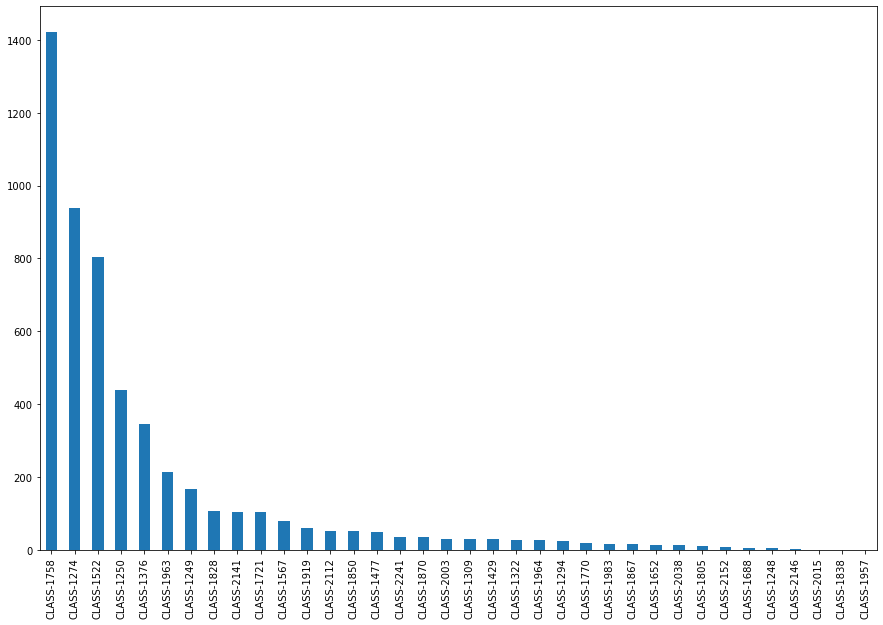

In [10]:
# Checking the distribution of target column

plt.figure(figsize=(15,10))
train_df['Product_Category'].value_counts().plot.bar()
plt.show()

In [11]:
# Also checking the 'Product_Category' counts as some categories are highly populated

train_df['Product_Category'].value_counts()

CLASS-1758    1421
CLASS-1274     939
CLASS-1522     803
CLASS-1250     440
CLASS-1376     347
CLASS-1963     215
CLASS-1249     167
CLASS-1828     107
CLASS-2141     103
CLASS-1721     103
CLASS-1567      80
CLASS-1919      61
CLASS-2112      52
CLASS-1850      51
CLASS-1477      48
CLASS-2241      36
CLASS-1870      35
CLASS-2003      31
CLASS-1309      31
CLASS-1429      30
CLASS-1322      28
CLASS-1964      27
CLASS-1294      24
CLASS-1770      19
CLASS-1983      16
CLASS-1867      15
CLASS-1652      14
CLASS-2038      13
CLASS-1805      10
CLASS-2152       9
CLASS-1688       4
CLASS-1248       4
CLASS-2146       2
CLASS-2015       1
CLASS-1838       1
CLASS-1957       1
Name: Product_Category, dtype: int64

In [12]:
print('The number of unique categories are:',train_df['Product_Category'].nunique())

The number of unique categories are: 36


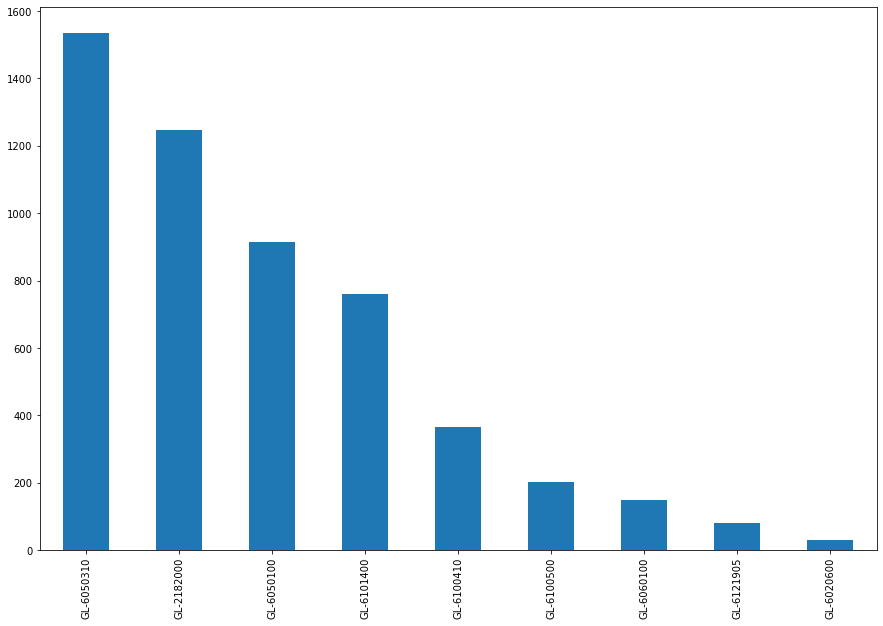

In [13]:
# Checking the distribution of 'GL_Code' column

plt.figure(figsize=(15,10))
train_df['GL_Code'].value_counts().plot.bar()
plt.show()

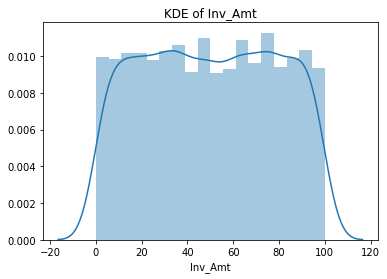

In [14]:
# Checking the kernel density estimation(kde) of 'Invoice_Amount'.

plt.figure()
plt.title('KDE of Inv_Amt')
sns.distplot(train_df['Inv_Amt'])

## Feature Encoding using Label encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
for col in ['GL_Code', 'Vendor_Code']:
    
    le = LabelEncoder()
    le.fit(list(train_df[col]) + list(test_df[col]))
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

train_df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,546,5,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,709,0,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,806,2,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,619,7,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,259,0,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


## Text Processing of Item_Description 

In [17]:
# printing some random 'Item_Description'
sent_0 = train_df['Item_Description'].values[0]
print(sent_0)
print('----------------------------------------')

sent_100 = train_df['Item_Description'].values[100]
print(sent_100)
print('----------------------------------------')

Artworking/Typesetting Production Jun 2009 Champion Parts Inc SMAP Prototype and Comp Production/Packaging Design
----------------------------------------
Corning Inc /Ny Auto Leasing 2019May Auto Leasing and Maintenance Other Corporate Services Corporate Services
----------------------------------------


In [18]:
!pip install wordcloud

In [19]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [20]:
!pip install tqdm

In [21]:
#The re.sub() function in the re(regular expressions) module can be used to replace substrings. 
# tqdm is for printing the status bar

from tqdm import tqdm
import re
preprocessed_text = []

for sentence in tqdm(train_df['Item_Description'].values):
    sentence = re.sub("\S*\d\S*", '', sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
    preprocessed_text.append(sentence.strip())

100%|███████████████████████████████████████████████████████████████████████████| 5288/5288 [00:00<00:00, 11761.74it/s]


In [22]:
train_df['Item_Description_Preprocessed'] = preprocessed_text
train_df.drop('Item_Description',axis=1,inplace=True)

In [23]:
train_df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Product_Category,Item_Description_Preprocessed
0,15001,546,5,83.24,CLASS-1963,artworking typesetting production jun champion...
1,15002,709,0,51.18,CLASS-1250,auto leasing corporate services corning inc ny...
2,15004,806,2,79.02,CLASS-1274,store management lease rent deltona corp real ...
3,15005,619,7,48.50,CLASS-1522,store construction general requirements coloni...
4,15006,259,0,63.35,CLASS-1376,jul aydin corp contingent labor temp labor con...


In [24]:
train_df['Item_Description_Preprocessed'].values

array(['artworking typesetting production jun champion parts inc smap prototype comp production packaging design',
       'auto leasing corporate services corning inc ny auto leasing maintenance corporate services',
       'store management lease rent deltona corp real estate base rent',
       ...,
       'logistics transportation services parcel postage courier etz lavud ltd supply chain',
       'addmaster corp magazines media buy traditional smap national advertising',
       'information technology managed services friedman samuel managed services managed services'],
      dtype=object)

In [25]:
!pip install nltk

In [26]:
import string
import nltk
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [27]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_text)
print("some sample features(unique words in the corpus) are: ",tf_idf_vect.get_feature_names()[0:20])
print('-'*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_text)
final_tf_idf_test = tf_idf_vect.transform(test_df['Item_Description'])
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) are:  ['account', 'acme', 'adr', 'adr ground', 'adr miscellaneous', 'adr travel', 'adv', 'advertising', 'advertising media', 'advertising smap', 'agency', 'agency agency', 'agency fees', 'agency production', 'agency smap', 'air', 'air products', 'akorn', 'akorn inc', 'akzo']
--------------------------------------------------
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (5288, 868)
the number of unique words including both unigrams and bigrams  868


In [28]:
target = LabelEncoder()
y_encoded = target.fit_transform(train_df['Product_Category'])

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(final_tf_idf, y_encoded, test_size=0.3, random_state=28)

In [30]:
!pip install xgboost

In [31]:
import xgboost as xgb
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softprob'
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = len(target.classes_)
param['eval_metric'] = ['mlogloss']
param['seed'] = 28

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

evallist = [(dtrain, 'train'), (dvalid, 'eval')]

clf = xgb.train(param, dtrain, 100, evallist, verbose_eval=50)

[0]	train-mlogloss:2.03301	eval-mlogloss:2.02688
[50]	train-mlogloss:0.01505	eval-mlogloss:0.02042
[99]	train-mlogloss:0.00418	eval-mlogloss:0.00933


In [32]:
# We use clf to store trained model values, which are further used to predict value, based on the previously stored weights.
y_pred_valid = clf.predict(dvalid)

print("Accuracy : ",accuracy_score(y_valid, np.argmax(y_pred_valid, axis=1)))

Accuracy :  0.9993698802772527


In [33]:
dtest = xgb.DMatrix(final_tf_idf_test)
y_test_pred = clf.predict(dtest)

In [34]:
# inverse_transform: Transform data back to its original space i.e. return an input X_original whose transform would be X.

output = test_df[['Inv_Id']].copy()
output['Product_Category'] = target.inverse_transform(np.argmax(y_test_pred, axis=1))

In [35]:
output['Product_Category'].nunique()

26

Out of total 36 classes the model can able to predict 26 classes with an accuracy of 99.8%

In [36]:
# Now checking with Cross-Validation
num_splits = 5
skf = StratifiedKFold(n_splits= num_splits, random_state=1, shuffle=True)

In [37]:
y_test_pred = np.zeros((test_df.shape[0], len(target.classes_)))
print(y_test_pred.shape)
y_valid_scores = []
X = train_df['Item_Description_Preprocessed']
fold_cnt = 1
dtest = xgb.DMatrix(final_tf_idf_test)

for train_index, test_index in skf.split(X, y_encoded):
    print("\nFOLD .... ",fold_cnt)
    fold_cnt += 1
    
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y_encoded[train_index], y_encoded[test_index]
    
    X_train_bow = tf_idf_vect.transform(X_train)   # X_train_bow is X_train Bag of Words(Bow)
    X_valid_bow = tf_idf_vect.transform(X_valid)   # X_valid_bow is X_valid Bag of Words(Bow)
    
    dtrain = xgb.DMatrix(X_train_bow, label=y_train)
    dvalid = xgb.DMatrix(X_valid_bow, label=y_valid)

    evallist = [(dtrain, 'train'), (dvalid, 'eval')]

    clf = xgb.train(param, dtrain, 100, evallist, verbose_eval=50)
    
    #Predict validation data
    y_pred_valid = clf.predict(dvalid)
    y_valid_scores.append(accuracy_score(y_valid, np.argmax(y_pred_valid, axis=1)))
    
    #Predict test data
    y_pred = clf.predict(dtest)
    
    y_test_pred += y_pred

(278, 36)

FOLD ....  1


c:\users\karan\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0]	train-mlogloss:2.01860	eval-mlogloss:2.03154
[50]	train-mlogloss:0.01409	eval-mlogloss:0.03295
[99]	train-mlogloss:0.00345	eval-mlogloss:0.02272

FOLD ....  2
[0]	train-mlogloss:2.01688	eval-mlogloss:2.02150
[50]	train-mlogloss:0.01444	eval-mlogloss:0.02385
[99]	train-mlogloss:0.00368	eval-mlogloss:0.01346

FOLD ....  3
[0]	train-mlogloss:2.01998	eval-mlogloss:2.01891
[50]	train-mlogloss:0.01458	eval-mlogloss:0.02246
[99]	train-mlogloss:0.00379	eval-mlogloss:0.01221

FOLD ....  4
[0]	train-mlogloss:2.01994	eval-mlogloss:2.02146
[50]	train-mlogloss:0.01444	eval-mlogloss:0.02062
[99]	train-mlogloss:0.00374	eval-mlogloss:0.00971

FOLD ....  5
[0]	train-mlogloss:2.01875	eval-mlogloss:2.01686
[50]	train-mlogloss:0.01441	eval-mlogloss:0.02081
[99]	train-mlogloss:0.00363	eval-mlogloss:0.01056


In [38]:
print("Validation Scores :", y_valid_scores)
print("Average Score: ",np.round(np.mean(y_valid_scores),3))

Validation Scores : [0.996268656716418, 0.9981185324553151, 0.9981060606060606, 0.9980952380952381, 0.997134670487106]
Average Score:  0.998


In [39]:
y_test_pred /= num_splits

In [40]:
output['Product_Category'] = target.inverse_transform(np.argmax(y_test_pred, axis=1))

In [41]:
output['Product_Category'].nunique()

26

Out of total 36 classes the model can able to predict 26 classes with an accuracy of 99.8% after cross validation.

In [42]:
output.to_csv("submission.csv", index=False)

In [43]:
output.head(30)

,Inv_Id,Product_Category
0,15041,CLASS-1274
1,15094,CLASS-1963
2,15112,CLASS-1758
3,15179,CLASS-1522
4,15212,CLASS-1758
5,15312,CLASS-2146
6,15316,CLASS-1250
7,15346,CLASS-1274
8,15399,CLASS-1522
9,15422,CLASS-1522
